#Importing and Prepocessing DataSets

Lien pour importer des fichiers à partir du drive : https://neptune.ai/blog/google-colab-dealing-with-files

Le but de ce code est de monter le répertoire "drive" dans l'environnement de travail,car les données que nous souhaitons utiliser sont stockées dans un dossier situé sur le drive.

In [65]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Lien des Datasets : https://www.football-data.co.uk/englandm.php
Nous avons pris les données de 2007 à 2022. Nous n'avons pas pris les données de 2023 car elles sont incomplètes. De plus, le jeu de données de la saison 2014-2015 contient 381 matchs. On remarque que la ligne 380 pour les données de la saison 2014-2015 ne contient que des valeurs nulles. Nous pouvons supprimer cette ligne.

Les variables utilisées sont :
* HomeTeam
* Away Team
* B365H = Bet365 home win odds 
* B365D =  Bet365 draw odds
* B365A = Bet365 away win odds
* HS = Home Team Shots
* AS = Away Team Shots
* HST = Home Team Shots on Target 
* AST = Away Team Shots on Target
* HC = Home Team Corners
* AC = Away Team Corners
* HF = Home Team Fouls Committed 
* AF = Away Team Fouls Committed
* HY = Home Team Yellow Cards 
* AY = Away Team Yellow Cards
* HR = Home Team Red Cards
* AR = Away Team Red Cards
* FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)


In [66]:
import pandas as pd

all_datasets = ['2007_2008','2008_2009','2009_2010', '2010_2011', '2011_2012', '2012_2013', '2013_2014', '2014_2015',
                '2015_2016', '2016_2017', '2017_2018', '2018_2019', '2019_2020', '2020_2021', '2021_2022']
all_seasons_frames = []
for x in all_datasets:
  season = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Projet_Intelligence_Artificielle /Data_{}.csv'.format(x)), 
                                  columns=['HomeTeam','AwayTeam', 'B365H', 'B365D','B365A', 'HS', 'AS', 'HST',
                                           'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'FTR'])
  if(x == '2014_2015') :
    season = season.drop(season[season.HomeTeam.isnull()].index)

  all_seasons_frames.append(pd.DataFrame(season))

### Types de données

Nous allons déterminer le type de nos données

In [67]:
df_all_frames = pd.concat(all_seasons_frames)
print(df_all_frames.dtypes)

HomeTeam     object
AwayTeam     object
B365H       float64
B365D       float64
B365A       float64
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
FTR          object
dtype: object


Ainsi, on a 15 variables continues et 3 variables catégorielles (HomeTeam, AwayTeam, FTR).

Puis, on va visualiser nos données

In [68]:
df_all_frames.head()

,HomeTeam,AwayTeam,B365H,B365D,B365A,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR
0,Aston Villa,Liverpool,4.00,3.25,1.90,10.0,17.0,6.0,7.0,4.0,2.0,18.0,11.0,4.0,2.0,0.0,0.0,A
1,Bolton,Newcastle,2.50,3.20,2.75,13.0,7.0,9.0,5.0,4.0,3.0,15.0,16.0,1.0,1.0,0.0,0.0,A
2,Derby,Portsmouth,2.80,3.25,2.40,12.0,12.0,5.0,6.0,6.0,6.0,14.0,17.0,1.0,2.0,0.0,0.0,D
3,Everton,Wigan,1.66,3.40,5.50,12.0,14.0,8.0,4.0,6.0,2.0,8.0,13.0,0.0,0.0,0.0,0.0,H
4,Middlesbrough,Blackburn,2.37,3.25,2.87,10.0,4.0,6.0,4.0,13.0,3.0,16.0,16.0,3.0,4.0,0.0,0.0,A


### Étude des données

On va spécifier les données qui serviront à l'entraînement

In [69]:
frames_trainingSet = all_seasons_frames.copy()
frames_trainingSet.pop(len(frames_trainingSet) - 1)
trainingSet = pd.concat(frames_trainingSet)

Voici les statistiques descriptives pour les variables continues.

En particulier nous obtenons le total, la moyenne, l'écart type, le minimum et le maximum.


In [ ]:
trainingSet.describe()

,B365H,B365D,B365A,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,2.840320,4.077624,4.966761,13.891541,11.145113,5.975564,4.782331,6.008083,4.783835,10.802632,11.224060,1.463910,1.755639,0.060902,0.084211
std,2.050143,1.236430,4.265884,5.447461,4.706581,3.411460,2.864422,3.129428,2.738987,3.497985,3.666357,1.192749,1.273793,0.248427,0.290306
min,1.060000,3.000000,1.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.660000,3.400000,2.380000,10.000000,8.000000,3.000000,3.000000,4.000000,3.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,2.200000,3.600000,3.500000,13.000000,11.000000,5.000000,4.000000,6.000000,4.000000,11.000000,11.000000,1.000000,2.000000,0.000000,0.000000
75%,3.100000,4.200000,5.500000,17.000000,14.000000,8.000000,6.000000,8.000000,6.000000,13.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,23.000000,17.000000,41.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,26.000000,7.000000,9.000000,2.000000,2.000000


On remarque que le minimum pour les tirs (HS, AS) est de 0. Ceci est très peu probable car en général durant un match chacune des équipes a au moins une opportunité de tir même si ceux-ci ne sont pas cadrés. Nous pouvons observer de plus près le(s) match(s) en question.

Voici les statistiques descriptives pour les variables catégorielles

In [70]:
trainingSet.describe(include=[object])

,HomeTeam,AwayTeam,FTR
count,5320,5320,5320
unique,39,39,3
top,Liverpool,Liverpool,H
freq,266,266,2423


On va comparer la distribution de certaines variables entre équipe à domicile et équipe à l'extérieur

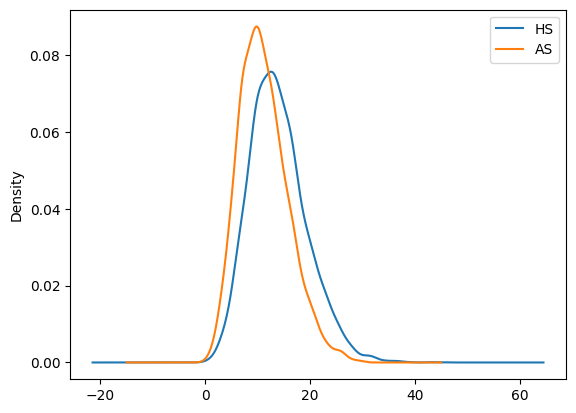

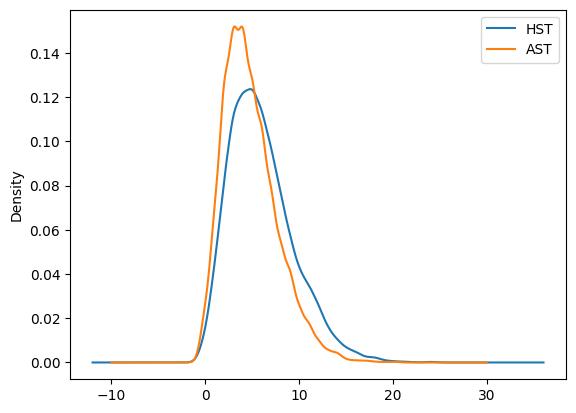

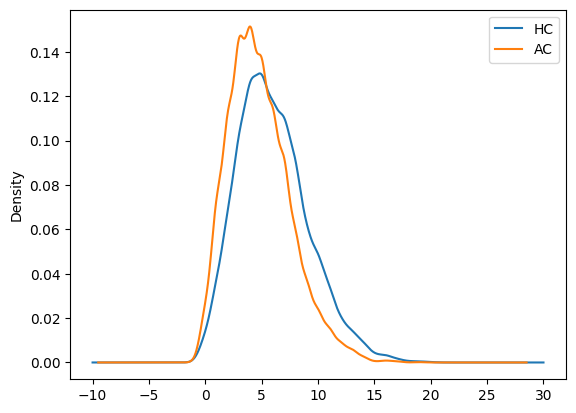

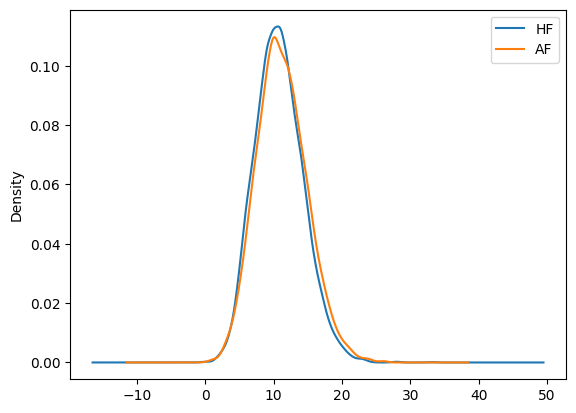

In [71]:
comparaisons = [['HS', 'AS'],['HST', 'AST'], ['HC', 'AC'],['HF', 'AF']]
for x in comparaisons :
  trainingSet.loc[:,x].plot.kde()

- On remarque que en ce concerne les occasion de tirs et de corners, la courbe pour les équipe à domicile est décalée vers la droite. Ceci suggère que les équipes jouant à domicile ont tendance à avoir plus d'occasion de tirs et de corners, on peut en déduire qu'elles adoptent un jeu offensif. Par contre, nous devons faire un test statistique pour savoir si cette différence est significative.
- En ce qui concerne les fautes, les distributions se superposent presque parfaitement ce qui ne nous donne pas vraiment d'intuition sur la stratégie de jeu des équipes.

Voici la distribution des résultats des matchs en fonction de H,A et D.

<Axes: >

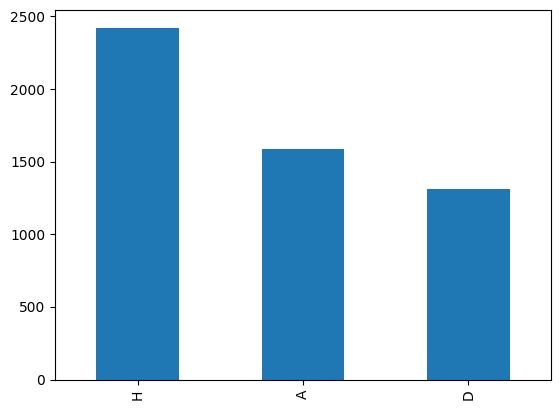

In [72]:
trainingSet['FTR'].value_counts().plot(kind='bar')

- Les équipes jouant à domiciles gagnent environs 1.5 fois plus souvent que leurs adversaires jouant à l'extérieur.
- Les matchs nulles apparaissent en plus faibles proportions. 

On va transformer les variables catégorielles. 

En premier, on va transformer les variables pour les équipes en variables binaires.

Puis, on va transformer la variable pour le résultat du match en valeurs numériques (0: A, 1: D, 2: H

In [73]:
from sklearn.preprocessing import LabelEncoder

df_all_frames_modif = pd.get_dummies(df_all_frames, columns=['HomeTeam', 'AwayTeam'])

label_make = LabelEncoder()
df_all_frames_modif["FTR_code"] = label_make.fit_transform(df_all_frames_modif["FTR"])
df_all_frames_modif[["FTR", "FTR_code"]].head(11)

,FTR,FTR_code
0,A,0
1,A,0
2,D,1
3,H,2
4,A,0
5,H,2
6,A,0
7,H,2
8,H,2
9,D,1


In [74]:
df_all_frames_modif = df_all_frames_modif.drop(['FTR'], axis=1)

season_21_22_modif = df_all_frames_modif[5320:5701]

trainingSet_modif = df_all_frames_modif[:5320]

# Modèles de base pour des données de football

On va évaluer la performance de quelques modèles de base pour les données de la saison 2021-2022:
* Premier modèle :  toutes les prédictions sont à H (HomeWin)

In [75]:
import copy
finalsetaSet = copy.deepcopy(season_21_22_modif)
finalset['pred'] = 2
err_finalset_mod1 = (sum(finalset.FTR_code!=finalset.pred)/len(finalset))*100
print("err_finalset_mod1: ", err_finalset_mod1, "%")

err_finalset_mod1:  57.10526315789474 %


* Deuxième modèle :  toutes les prédictions sont à A (AwayWin)

In [76]:
finalset = copy.deepcopy(season_21_22_modif)
finalset['pred'] = 0
err_finalset_mod2 = (sum(finalset.FTR_code!=finalset.pred)/len(finalset))*100
print("err_finalset_mod2: ", err_finalset_mod2, "%")

err_finalset_mod2:  66.05263157894737 %


* Troisième modèle : toutes les prédictions sont à D (Draw)

In [77]:
finalset = copy.deepcopy(season_21_22_modif)
finalset['pred'] = 1
err_finalset_mod3 = (sum(finalset.FTR_code!=finalset.pred)/len(finalset))*100
print("err_finalset_mod3: ", err_finalset_mod3, "%")


err_finalset_mod3:  76.84210526315789 %


# Splitting training and data sets

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split

df_x = pd.DataFrame(trainingSet_modif.iloc[:,0:95])
x = pd.DataFrame(df_x).to_numpy()
y = np.array(trainingSet_modif.iloc[:,95])

X_train, X_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=0.2, random_state=1234)

# MLP

### Finding the best netwotk depth

On va fixer la profondeur du réseau et on évalue la taille optimale des couches avec notre échantillon de validation (testset dans ce cas)

On cherche un optimum local en considérant 5 profondeurs range(1, 2, 3, 4, 5) et des tailles dans range(1, 21, 2) (même taille entre les couches d'un même modèle)


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    from sklearn.neural_network import MLPClassifier

    c = ['tailleCouche', 'error_nn_test']
    df1 = pd.DataFrame(columns=c)
    df2 = pd.DataFrame(columns=c)
    df3 = pd.DataFrame(columns=c)
    df4 = pd.DataFrame(columns=c)
    df5 = pd.DataFrame(columns=c)


    for a in range(1, 21, 2):

      clf1 = MLPClassifier(hidden_layer_sizes=(a,), 
                            activation='logistic', 
                            solver='lbfgs',
                            random_state=0,
                            max_iter=500,
                            tol=1e-7).fit(X_train, y_train)

      clf2 = MLPClassifier(hidden_layer_sizes=(a,a,), 
                            activation='logistic', 
                            solver='lbfgs',
                            random_state=0,
                            max_iter=500,
                            tol=1e-7).fit(X_train, y_train)

      clf3 = MLPClassifier(hidden_layer_sizes=(a,a,a,), 
                            activation='logistic', 
                            solver='lbfgs',
                            random_state=0,
                            max_iter=500,
                            tol=1e-7).fit(X_train, y_train)

      clf4 = MLPClassifier(hidden_layer_sizes=(a,a,a,a,), 
                            activation='logistic', 
                            solver='lbfgs',
                            random_state=0,
                            max_iter=500,
                            tol=1e-7).fit(X_train, y_train)

      clf5 = MLPClassifier(hidden_layer_sizes=(a,a,a,a,a,), 
                              activation='logistic', 
                              solver='lbfgs',
                              random_state=0,
                              max_iter=500,
                              tol=1e-7).fit(X_train, y_train)

      df1 = pd.concat([df1,pd.DataFrame([[a, (1 - clf1.score(X_test, y_test))*100 ]], columns=c)], axis = 0)
      df2 = pd.concat([df2,pd.DataFrame([[a, (1 - clf2.score(X_test, y_test))*100 ]], columns=c)], axis = 0)
      df3 = pd.concat([df3,pd.DataFrame([[a, (1 - clf3.score(X_test, y_test))*100 ]], columns=c)], axis = 0)
      df4 = pd.concat([df4,pd.DataFrame([[a, (1 - clf4.score(X_test, y_test))*100 ]], columns=c)], axis = 0)
      df5 = pd.concat([df5,pd.DataFrame([[a, (1 - clf5.score(X_test, y_test))*100 ]], columns=c)], axis = 0)



Text(0.5, 1.0, 'Depth 5')

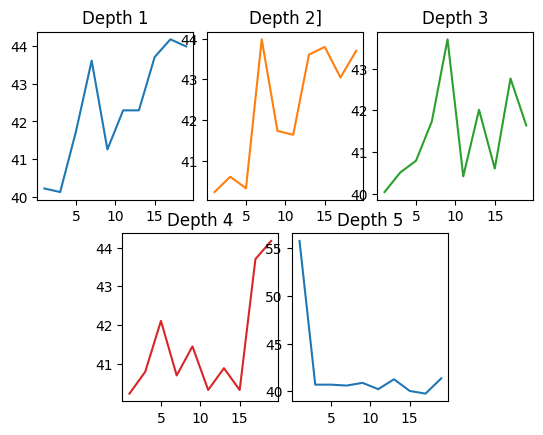

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig = plt.figure()
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) 

ax1 = fig.add_subplot(spec[0,0:2]) 
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3]) 
ax5 = fig.add_subplot(spec[1,3:5])

ax1.plot(df1.tailleCouche, df1.error_nn_test)
ax1.set_title('Depth 1',)
ax2.plot(df2.tailleCouche, df2.error_nn_test, 'tab:orange')
ax2.set_title('Depth 2]')
ax3.plot(df3.tailleCouche, df3.error_nn_test, 'tab:green')
ax3.set_title('Depth 3')
ax4.plot(df4.tailleCouche, df4.error_nn_test, 'tab:red')
ax4.set_title('Depth 4')
ax5.plot(df5.tailleCouche, df5.error_nn_test)
ax5.set_title('Depth 5')

### MLP with activation relu

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(3,3,3,), 
                          activation='relu', 
                          solver='lbfgs',
                          random_state=0,
                          max_iter=500,
                          tol=1e-7).fit(X_train, y_train)

pred_nn_train = clf.predict(X_train)
pred_nn_test = clf.predict(X_test)

error_nn_train = (1 - clf.score(X_train, y_train))*100
error_nn_test =  (1 - clf.score(X_test, y_test))*100 

print("Error train MLPClassifier: ", error_nn_train, "%")
print("Error test MLPClassifier: ",  error_nn_test, "%")

Error train MLPClassifier:  38.88627819548872 %
Error test MLPClassifier:  40.22556390977443 %


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### MLP with activation tanh

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(3,3,3,), 
                          activation='tanh', 
                          solver='lbfgs',
                          random_state=0,
                          max_iter=500,
                          tol=1e-7).fit(X_train, y_train)

pred_nn_train = clf.predict(X_train)
pred_nn_test = clf.predict(X_test)

error_nn_train = (1 - clf.score(X_train, y_train))*100
error_nn_test =  (1 - clf.score(X_test, y_test))*100 

print("Error train MLPClassifier: ", error_nn_train, "%")
print("Error test MLPClassifier: ",  error_nn_test, "%")



Error train MLPClassifier:  38.32236842105263 %
Error test MLPClassifier:  40.22556390977443 %


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### MLP with activation logistic and solver lbfgs

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(3,3,3,), 
                          activation='logistic', 
                          solver='lbfgs',
                          random_state=0,
                          max_iter=500,
                          tol=1e-7).fit(X_train, y_train)

pred_nn_train = clf.predict(X_train)
pred_nn_test = clf.predict(X_test)

error_nn_train = (1 - clf.score(X_train, y_train))*100
error_nn_test =  (1 - clf.score(X_test, y_test))*100 

print("Error train MLPClassifier: ", error_nn_train, "%")
print("Error test MLPClassifier: ",  error_nn_test, "%")


Error train MLPClassifier:  38.580827067669176 %
Error test MLPClassifier:  40.50751879699248 %


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### MLP with activation logistic and adam

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(3,3,3,), 
                          activation='logistic', 
                          solver='adam',
                          random_state=0,
                          max_iter=500,
                          tol=1e-7).fit(X_train, y_train)

pred_nn_train = clf.predict(X_train)
pred_nn_test = clf.predict(X_test)

error_nn_train = (1 - clf.score(X_train, y_train))*100
error_nn_test =  (1 - clf.score(X_test, y_test))*100 

print("Error train MLPClassifier: ", error_nn_train, "%")
print("Error test MLPClassifier: ",  error_nn_test, "%")


Error train MLPClassifier:  37.59398496240601 %
Error test MLPClassifier:  39.28571428571429 %


# Net

On a utilisé l'article suivant :
https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-ii-3d02b2ddd538

In [ ]:
import torch
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid() 
    def forward(self, x):
        hidden = self.fc1(x)
        sig = self.sigmoid(hidden)
        relu = self.relu(sig)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output

In [ ]:
#convert to tensors
training_input = torch.FloatTensor(X_train)
training_output = torch.FloatTensor(y_train)
test_input = torch.FloatTensor(X_test)
test_output = torch.FloatTensor(y_test)

In [ ]:
input_size = training_input.size()[1] # number of features selected
hidden_size = 20 # number of nodes/neurons in the hidden layer
model = Net(input_size, hidden_size) # create the model
criterion = torch.nn.BCELoss() # works for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) 

In [ ]:
model.eval()
y_pred = model(test_input)
before_train = criterion(y_pred.squeeze(), test_output)
print('Test loss before training' , before_train.item())

Test loss before training 0.7460142970085144


In [ ]:
model.train()
epochs = 500
errors = []
training_input
y_pred
def closure():
    optimizer.zero_grad()
    y_pred = model(training_input)
    loss = criterion(y_pred.squeeze(), training_output)
    loss.backward()
    return loss

for epoch in range(epochs):
    optimizer.step(closure)

In [ ]:
model.eval()
y_pred = model(test_input)
after_train = criterion(y_pred.squeeze(), test_output)
print('Test loss after Training' , after_train.item())

Test loss after Training -3.0839781761169434


In [ ]:
# Pred saison 2021-2022
finalset = season_21_22_modif.drop(['FTR_code'], axis=1)
finalset = finalset.drop(['pred'], axis=1)
finalset = torch.FloatTensor(pd.DataFrame(finalset).to_numpy())
pred_season_21_22 = model(finalset)
pred_season_21_22 = pd.DataFrame(pred_season_21_22.detach().numpy())
pred_season_21_22.columns = ['pred']
pred_season_21_22.head()

,pred
0,0.996602
1,1.000000
2,0.999699
3,1.000000
4,1.000000


In [ ]:
label_make = LabelEncoder()
season_21_22_eval = all_seasons_frames[len(all_seasons_frames)-1]
season_21_22_eval["FTR_code"] = label_make.fit_transform(season_21_22_eval["FTR"])
season_21_22_eval['Pred'] = pred_season_21_22['pred'].astype(int)

In [ ]:
#Calculons l'erreur de généralisation de notre modèle (pour les données de la saison 2021_2022)

error_nn_season_21_22 =  (sum(season_21_22_eval.FTR_code!=season_21_22_eval.Pred)/len(season_21_22_eval))*100

print("Erreur saison 2019-2020: ", error_nn_season_21_22, "%")

Erreur saison 2019-2020:  66.05263157894737 %


# DNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

#Normalize the input data

scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train)
X_test3 = scaler.transform(X_test)
y_train3 = y_train
y_test3 = y_test

#Define the model

model = Sequential([
Dense(128, activation='relu', input_shape=(X_train3.shape[1],)),
Dropout(0.2),
Dense(64, activation='relu'),
Dropout(0.2),
Dense(32, activation='relu'),
Dropout(0.2),
Dense(1, activation='softmax')
])

#Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Use early stopping to prevent overfitting

early_stop = EarlyStopping(monitor='val_loss', patience=5)

#Train the model

history = model.fit(X_train3, y_train3, epochs=50, batch_size=64, validation_data=(X_test3, y_test3), callbacks=[early_stop])

#Evaluate the model

score_train = model.evaluate(X_train3, y_train3, verbose=0)
score_test = model.evaluate(X_test3, y_test3, verbose=0)
error_nn_train = (1 - score_train[1]) * 100
error_nn_test = (1 - score_test[1]) * 100

print("Error train DNN: ", error_nn_train, "%")
print("Error test DNN: ", error_nn_test, "%")

Epoch 1/50
67/67 [==============================] - 2s 7ms/step - loss: -4.4110 - accuracy: 0.2446 - val_loss: -17.8163 - val_accuracy: 0.2547
Epoch 2/50
67/67 [==============================] - 0s 4ms/step - loss: -166.3313 - accuracy: 0.2446 - val_loss: -509.2274 - val_accuracy: 0.2547
Epoch 3/50
67/67 [==============================] - 0s 3ms/step - loss: -1981.0226 - accuracy: 0.2446 - val_loss: -4282.3145 - val_accuracy: 0.2547
Epoch 4/50
67/67 [==============================] - 0s 4ms/step - loss: -10316.4961 - accuracy: 0.2446 - val_loss: -17918.6660 - val_accuracy: 0.2547
Epoch 5/50
67/67 [==============================] - 0s 4ms/step - loss: -34044.3320 - accuracy: 0.2446 - val_loss: -51822.9492 - val_accuracy: 0.2547
Epoch 6/50
67/67 [==============================] - 0s 4ms/step - loss: -87321.0078 - accuracy: 0.2446 - val_loss: -120546.5625 - val_accuracy: 0.2547
Epoch 7/50
67/67 [==============================] - 0s 4ms/step - loss: -185667.6094 - accuracy: 0.2446 - val_lo

In [ ]:
#Importance des variables pour le réseau de neurone (plus grand => plus important)
from sklearn.inspection import permutation_importance
r = permutation_importance(clf, X_test, y_test, n_repeats=30,random_state=0)
print(r.importances_mean)

[ 4.13220551e-02  2.88220551e-03  3.19548872e-02  2.80701754e-02
  1.21867168e-02  1.00877193e-01  8.51817043e-02  1.59774436e-02
  2.04573935e-02  3.82205514e-03  7.83208020e-04  5.41979950e-03
  1.12781955e-03  9.49248120e-03  1.30012531e-02  8.14536341e-04
  1.47243108e-03  1.44110276e-03 -1.00250627e-03 -3.13283208e-05
 -9.39849624e-05 -3.44611529e-04  0.00000000e+00  1.37844612e-03
  1.66040100e-03 -6.26566416e-05  3.75939850e-04  1.44110276e-03
  6.26566416e-04 -5.95238095e-04  9.08521303e-04  3.13283208e-05
  2.60025063e-03  9.39849624e-04  1.87969925e-04 -6.26566416e-05
  2.50626566e-03  1.66040100e-03 -2.22044605e-17  3.19548872e-03
  6.26566416e-05  3.07017544e-03  1.00250627e-03  1.56641604e-04
  1.00250627e-03 -4.07268170e-04 -9.39849624e-04  1.25313283e-04
  8.14536341e-04 -1.00250627e-03 -6.26566416e-05  1.44110276e-03
  2.19298246e-04  6.89223058e-04  1.87969925e-04  8.14536341e-04
  1.09649123e-03  6.26566416e-05 -2.22044605e-17 -3.13283208e-05
  1.15914787e-03 -2.59052

- Variables les plus importantes: Tirs cadrés de l'équipe à domicile, Tirs cadrés de l'équipe à l'extérieur, cote de victoire de l'équipe à domicile

# Predict the best model 

On a decidé de prédire avec le modèle MLP et la fonction d'activation logistic et le solver adam étant donné qu'il s'agit du modèle avec le taux d'erreur le plus faible.

In [ ]:
finalset = season_21_22_modif.drop(['FTR_code'], axis=1)
finalset = finalset.drop(['pred'], axis=1)
pred_season_21_22 = clf.predict(finalset)
pred_season_21_22 = pd.DataFrame(pred_season_21_22)
pred_season_21_22.columns = ['pred']
pred_season_21_22.head()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


,pred
0,2
1,2
2,0
3,2
4,2


In [ ]:
label_make = LabelEncoder()
season_21_22_eval = all_seasons_frames[len(all_seasons_frames)-1]
season_21_22_eval["FTR_code"] = label_make.fit_transform(season_21_22_eval["FTR"])
season_21_22_eval['Pred'] = pred_season_21_22['pred'].astype(int)
season_21_22_eval.head(15)


,HomeTeam,AwayTeam,B365H,B365D,B365A,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,FTR_code,Pred
0,Brentford,Arsenal,4.00,3.40,1.95,8,22,3,4,2,5,12,8,0,0,0,0,H,2,2
1,Man United,Leeds,1.53,4.50,5.75,16,10,8,3,5,4,11,9,1,2,0,0,H,2,2
2,Burnley,Brighton,3.10,3.10,2.45,14,14,3,8,7,6,10,7,2,1,0,0,A,0,0
3,Chelsea,Crystal Palace,1.25,5.75,13.00,13,4,6,1,5,2,15,11,0,0,0,0,H,2,2
4,Everton,Southampton,1.90,3.50,4.00,14,6,6,3,6,8,13,15,2,0,0,0,H,2,2
5,Leicester,Wolves,1.66,3.80,5.25,9,17,5,3,5,4,6,10,1,2,0,0,H,2,2
6,Watford,Aston Villa,3.10,3.20,2.37,13,11,7,2,2,4,18,13,3,1,0,0,H,2,2
7,Norwich,Liverpool,9.00,5.75,1.30,14,19,3,8,3,11,4,14,1,1,0,0,A,0,0
8,Newcastle,West Ham,3.20,3.50,2.20,17,8,3,9,7,6,4,3,1,0,0,0,A,0,0
9,Tottenham,Man City,5.50,4.20,1.60,13,18,3,4,3,11,11,8,2,1,0,0,H,2,2


On va calculer l'erreur de généralisation de notre modèle pour les données de la saison 2021_2022

In [ ]:
error_nn_season_21_22 =  (sum(season_21_22_eval.FTR_code!=season_21_22_eval.Pred)/len(season_21_22_eval))*100

print("Erreur saison 2019-2020: ", error_nn_season_21_22, "%")


Erreur saison 2019-2020:  35.26315789473684 %


In [ ]:
data_HomeWin=pd.DataFrame(season_21_22_eval.loc[season_21_22_eval.Pred == 2,'HomeTeam'].value_counts()).reindex(season_21_22_eval.HomeTeam.unique(), fill_value=0)
data_HomeWin.columns = ['HomeWin']

data_AwayWin=pd.DataFrame(season_21_22_eval.loc[season_21_22_eval.Pred == 0,'AwayTeam'].value_counts()).reindex(season_21_22_eval.AwayTeam.unique(), fill_value=0)
data_AwayWin.columns = ['AwayWin']

data_HomeDraw=pd.DataFrame(season_21_22_eval.loc[season_21_22_eval.Pred == 1,'HomeTeam'].value_counts()).reindex(season_21_22_eval.HomeTeam.unique(), fill_value=0)
data_HomeDraw.columns = ['HomeDraw']

data_AwayDraw=pd.DataFrame(season_21_22_eval.loc[season_21_22_eval.Pred == 1,'AwayTeam'].value_counts()).reindex(season_21_22_eval.AwayTeam.unique(), fill_value=0)
data_AwayDraw.columns = ['AwayDraw']

data_HomeLose=pd.DataFrame(season_21_22_eval.loc[season_21_22_eval.Pred == 0,'HomeTeam'].value_counts()).reindex(season_21_22_eval.HomeTeam.unique(), fill_value=0)
data_HomeLose.columns = ['HomeLose']

data_AwayLose=pd.DataFrame(season_21_22_eval.loc[season_21_22_eval.Pred == 2,'AwayTeam'].value_counts()).reindex(season_21_22_eval.AwayTeam.unique(), fill_value=0)
data_AwayLose.columns = ['AwayLose']


output = pd.concat([data_HomeWin, data_AwayWin, data_HomeDraw, data_AwayDraw, data_HomeLose, data_AwayLose], axis=1, join='inner')
output

,HomeWin,AwayWin,HomeDraw,AwayDraw,HomeLose,AwayLose
Brentford,9,6,0,0,10,13
Man United,15,10,0,0,4,9
Burnley,8,2,0,0,11,17
Chelsea,16,12,0,1,3,6
Everton,6,4,1,1,12,14
Leicester,13,9,0,0,6,10
Watford,7,6,0,0,12,13
Norwich,3,1,0,0,16,18
Newcastle,10,6,0,0,9,13
Tottenham,16,13,0,0,3,6


<Axes: >

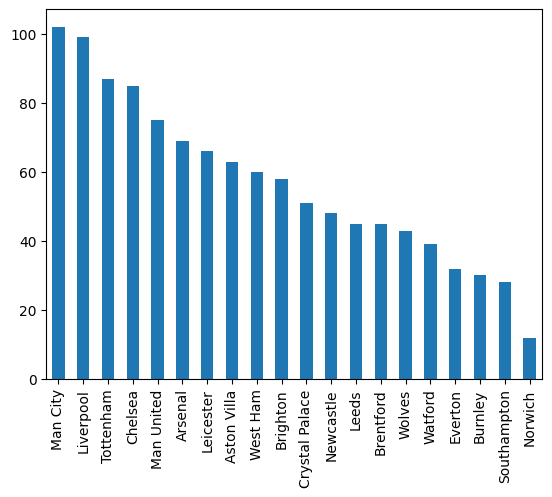

In [ ]:
output['Points'] = output['HomeWin']*3 + output['AwayWin']*3 + output['HomeDraw']*1 + output['AwayDraw']*1

output['Points'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
output.sort_values(by=['Points'], ascending=False, inplace=True)
output

,HomeWin,AwayWin,HomeDraw,AwayDraw,HomeLose,AwayLose,Points
Man City,18,16,0,0,1,3,102
Liverpool,18,15,0,0,1,4,99
Tottenham,16,13,0,0,3,6,87
Chelsea,16,12,0,1,3,6,85
Man United,15,10,0,0,4,9,75
Arsenal,14,9,0,0,5,10,69
Leicester,13,9,0,0,6,10,66
Aston Villa,11,10,0,0,8,9,63
West Ham,11,9,0,0,8,10,60
Brighton,8,11,1,0,10,8,58
